In [9]:
import numpy as np
from math import *
import random
import pandas as pd
import random
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.animation as animation

In [10]:
stateC = 'O'
stateD = '|'

class Player():
    def __init__(self, i, j, mode: str='stateC'):
        if mode == 'random':
            self.state = random.choice([stateC, stateD])
        elif mode == 'stateC':
            self.state = stateC
        elif mode == 'stateD':
            self.state = stateD
        self.old_state = self.state
        self.score = 0
        self.position = (i, j)
    
    def __str__(self):
        return self.state

class Scenario():
    def __init__(self, L, mode: str='stateC'):
        self.side = L
        self.board = np.ndarray([L, L], dtype=object)
        for i in range(L):
            for j in range(L):
                self.board[i][j] = Player(i, j, mode)
                
    def players(self):
        string = ''
        for row in self.board:
            for element in row:
                string += f'{element.state} '
            string += '\n'
        return f'{string}'
                
    def scores(self):
        string = ''
        for row in self.board:
            for element in row:
                string += f'{element.score} '
            string += '\n'
        return f'{string}'
    
    def neighbours(self, player: Player):
        I, J = player.position
        result = [
            ((I)%self.side, (J+1)%self.side),
            ((I+1)%self.side, (J)%self.side),
            ((I)%self.side, (J-1)%self.side),
            ((I-1)%self.side, (J)%self.side),
            ((I+1)%self.side, (J+1)%self.side),
            ((I-1)%self.side, (J+1)%self.side),
            ((I+1)%self.side, (J-1)%self.side),
            ((I-1)%self.side, (J-1)%self.side),
        ]
        random.shuffle(result)
        return result
    
    def update_states(self):
        for i in range(self.side):
            for j in range(self.side):
                self.board[i][j].old_state = self.board[i][j].state
        for i in range(self.side):
            for j in range(self.side):
                p = -np.inf
                neighbours_coordinates = self.neighbours(self.board[i][j])
                for (I, J) in neighbours_coordinates:
                    score2 = self.board[I][J].score
                    if score2 > p:
                        p = score2
                        self.board[i][j].state = self.board[I][J].old_state
        for i in range(self.side):
            for j in range(self.side):
                self.board[i][j].score = 0

    def count(self):
        countC = 0
        countD = 0
        for i in range(self.side):
            for j in range(self.side):
                if self.board[i][j].state == stateC:
                    countC += 1
                elif self.board[i][j].state == stateD:
                    countD += 1
        countD = countD/(self.side**2)
        countC = countC/(self.side**2)
        return [countC, countD]

    def show_players(self):
        X, Y = np.meshgrid(list(range(self.side)), list(range(self.side)))
        plotter = []
        for i in range(self.side):
            for j in range(self.side):
                if self.board[i][j].state == stateC:
                    plotter.append(100)
                elif self.board[i][j].state == stateD:
                    plotter.append(0)

        graph = []        
        for i in range(self.side):
            graph.append(plotter[i*self.side:(i+1)*self.side])
        plt.pcolormesh(X, Y, graph, cmap='Greys', vmin=0, vmax=100)
        plt.show()

In [ ]:
def set_score(player1: Player, player2: Player):
    state1 = player1.state
    state2 = player2.state
    if state1 == stateC:
        if state2 == stateC:
            player1.score += 1/2
            player2.score += 1/2
        elif state2 == stateD:
            player2.score += B/2
    if state1 == stateD:
        if state2 == stateC:
            player1.score += B/2

In [ ]:
B = 1.45
L = 200
n_iter = 300

scenario = Scenario(L, mode='stateC')
scenario.board[int(L/2)][int(L/2)] = Player(int(L/2), int(L/2), mode='stateD')
for _ in range(n_iter):
    plt.cla()
    scenario.show_players()
    for i in range(L):
        for j in range(L):
            player1 = scenario.board[i][j]
            for (I, J) in scenario.neighbours(player1):
                player2 = scenario.board[I][J]
                set_score(player1, player2)
    scenario.update_states()

In [ ]:
stateC = 'O'
stateD = '|'

B = 1
L = 100

n_iter = 300

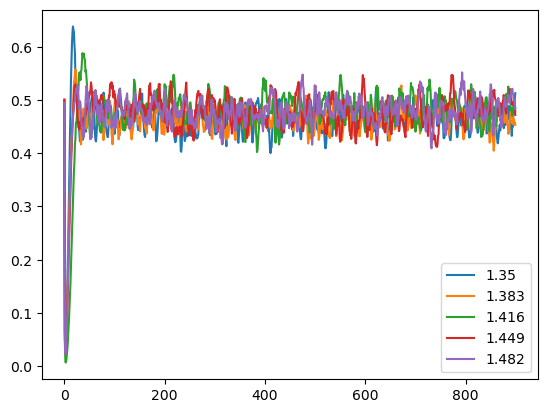

In [36]:
X = []
for B in range(1350, 1501, 33):
    B = B/1000
    
    scenario = Scenario(L, mode='random')
    # scenario.board[int(L/2)][int(L/2)] = Player(int(L/2), int(L/2), mode='stateD')
    X1 = []
    X2 = []
    for _ in range(n_iter):
        for i in range(L):
            for j in range(L):
                player1 = scenario.board[i][j]
                for (I, J) in scenario.neighbours(player1):
                    player2 = scenario.board[I][J]
                    set_score(player1, player2)
        X1.append(scenario.count()[0])
        # X2.append(scenario.count()[1])
        scenario.update_states()
    plt.plot(X1, label=f'{B}')
    # plt.plot(X2)
    X.append(X1)
plt.legend()

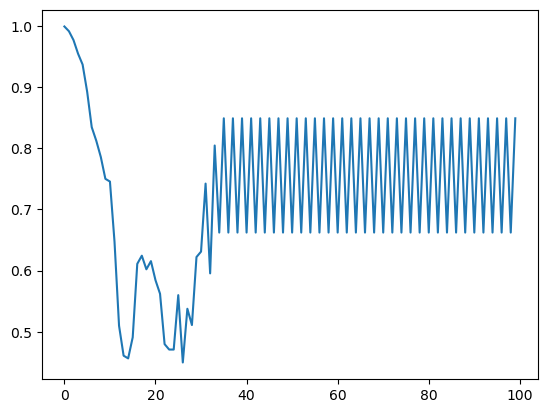

In [ ]:
scenario = Scenario(L)
scenario.board[int(L/2)][int(L/2)] = Player(int(L/2), int(L/2), mode='stateD')
B = 1.395
n_iter = 100
X1 = []
X2 = []
for _ in range(n_iter):
    for i in range(L):
        for j in range(L):
            player1 = scenario.board[i][j]
            for (I, J) in scenario.neighbours(player1):
                player2 = scenario.board[I][J]
                set_score(player1, player2)
    X1.append(scenario.count()[0])
    scenario.update_states()
plt.plot(X1, label=f'{B}')